Using the dataset in EFIplus_medit.zip:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest

In [ ]:
df = pd.read_csv('../../examples/EFIplus_medit.zip',compression='zip', sep=";")

In [3]:
df.head(5)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## 1. Check visually if any of the continuous environmental variables in the EFIplus_medit dataset (Altitude, Actual_river_slope, Elevation_mean_catch, prec_ann_catch, temp_ann, temp_jan, temp_jul) would require a data transformation in order to apply parametric tests.

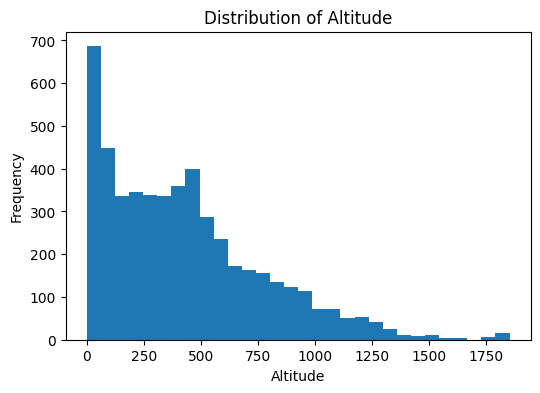

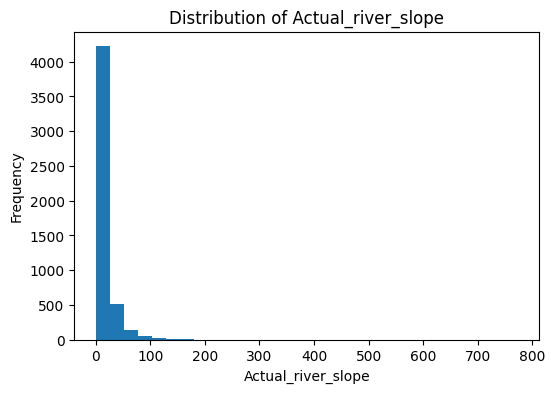

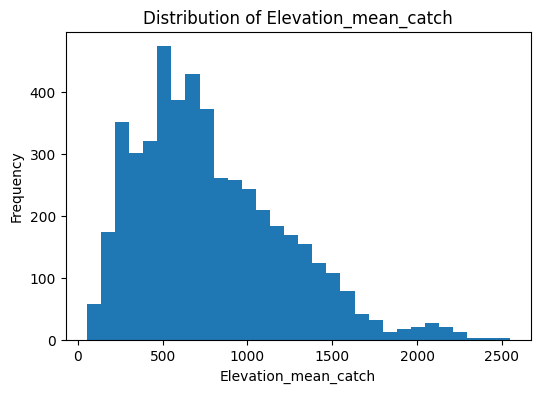

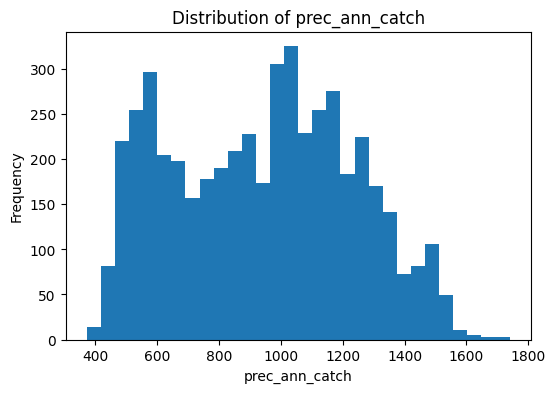

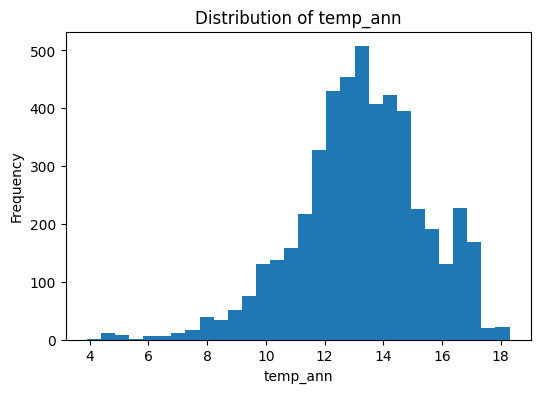

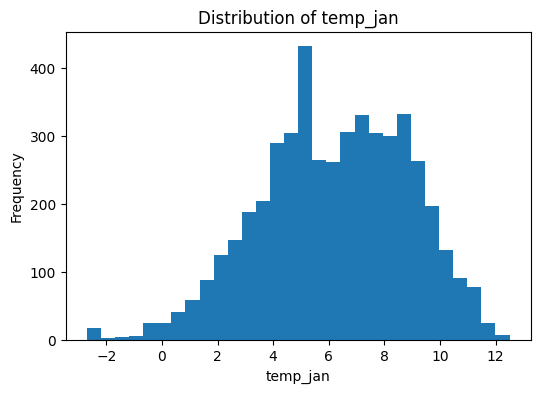

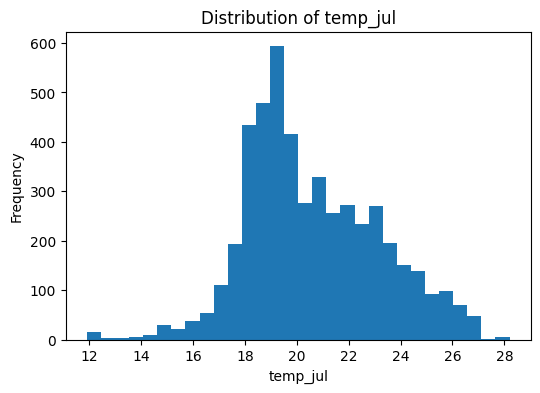

In [4]:
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Create histograms for each variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    plt.hist(df[var], bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


It appears that several plots are quite skewed, and therefore not close to normally distributed. The temp distributions and prec_ann_catch don't look too skewed, however the first three: altitude, river slope, and elevation mean catch, look quite skewed.

## 2. Apply the appropriate data transformation and check the new distributions.

The temperature variables seem okay compared to the others that have large skews.

As all of these variables can be zero, we don't need to check for zeroes, so only checking for NaN's.

Skewness of Altitude: 1.0017531437520488
log


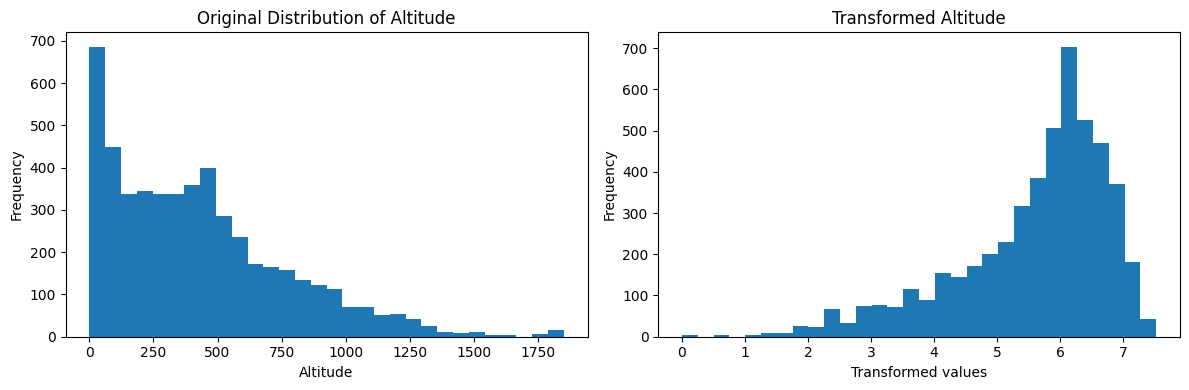

Skewness after transformation: -1.1845004243332455

Skewness of Actual_river_slope: 10.318282505123214
log


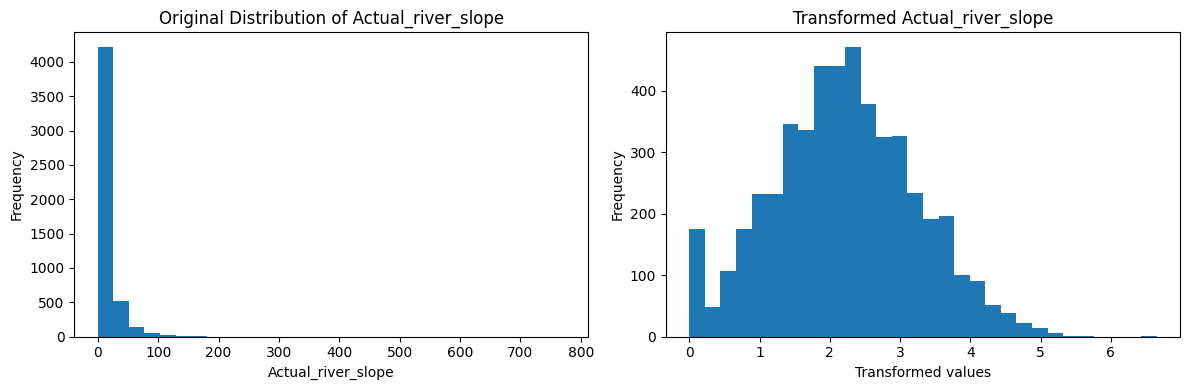

Skewness after transformation: 0.0877846845479317

Skewness of Elevation_mean_catch: 0.8489528047211309
sqrt


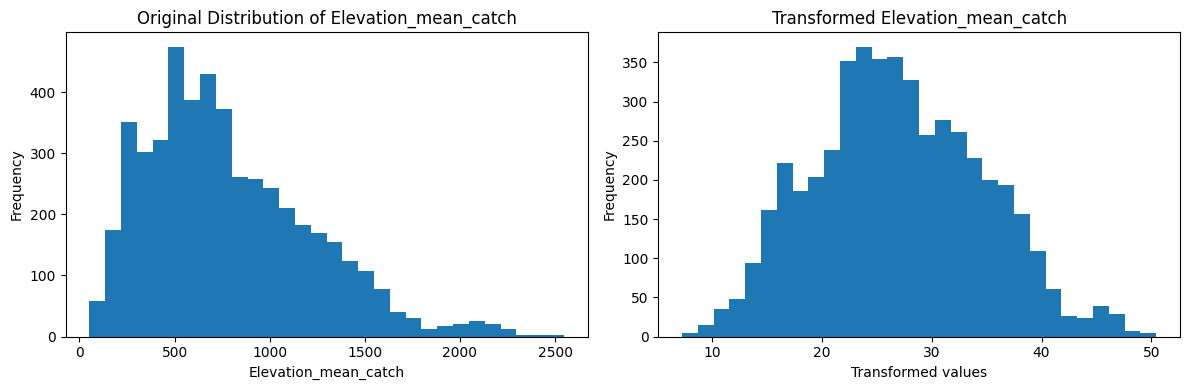

Skewness after transformation: 0.1941199363588578

Skewness of prec_ann_catch: 0.05819491759955462
sqrt


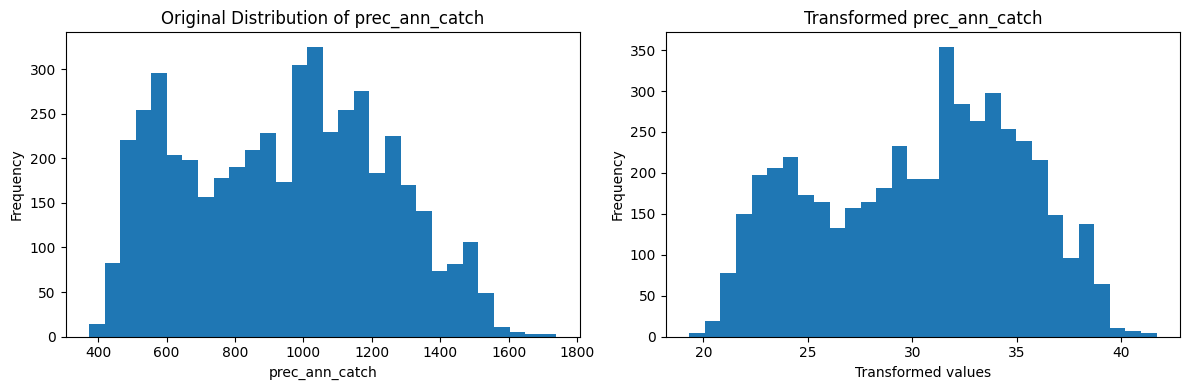

Skewness after transformation: -0.17696691554048508

Skewness of temp_ann: -0.4764689597813726
sqrt


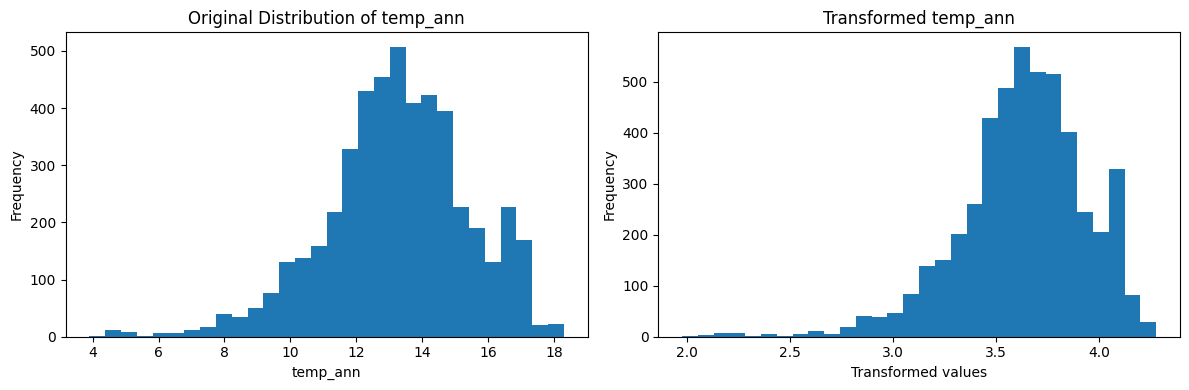

Skewness after transformation: -0.8787761256421674

Skewness of temp_jan: -0.2878683960803723
sqrt


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


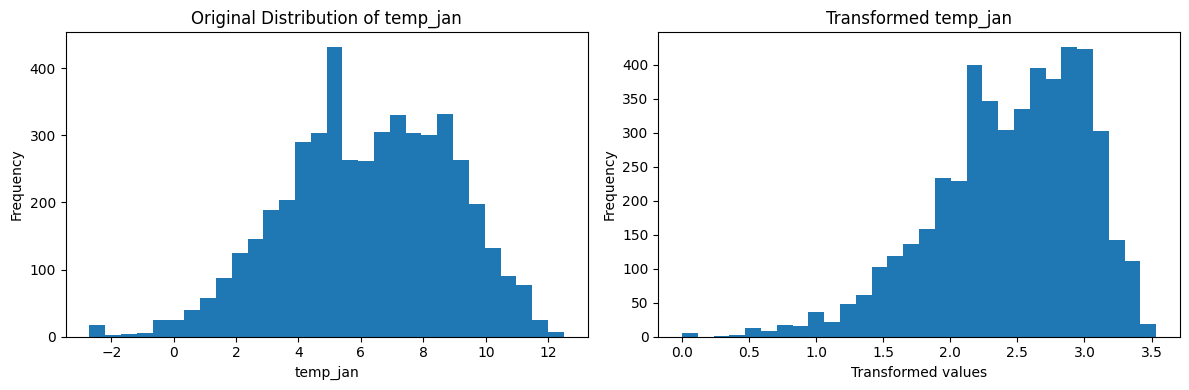

Skewness after transformation: -0.7615356076063688

Skewness of temp_jul: 0.2879637749414224
sqrt


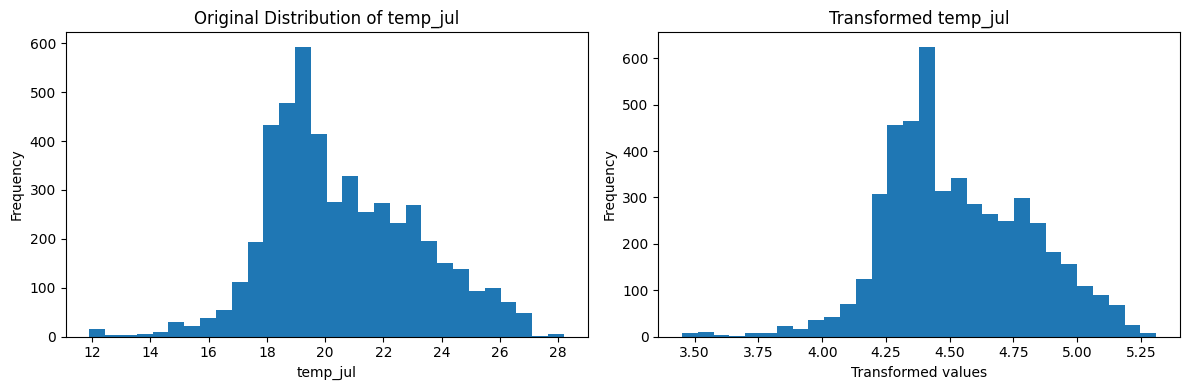

Skewness after transformation: 0.09720664812574872



In [37]:
# Apply transformations and check distributions
for var in continuous_vars:
    # Check for skewness
    skewness = df[var].skew()
    print(f"Skewness of {var}: {skewness}")

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(df[var], bins=30)
    plt.title(f'Original Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    # Apply transformations based on skewness
    if skewness > 1:  # highly skewed, try log transformation
        transformed_var = np.log1p(df[var])
        print('log')
    elif skewness < -1: # Highly negatively skewed try exp transformation
      transformed_var = np.exp(df[var])
      print('exp')
    else: #mild skewness or symmetric, try square root
      transformed_var = np.sqrt(df[var])
      print('sqrt')

    # Check the distribution of the transformed data
    plt.subplot(1, 2, 2)
    plt.hist(transformed_var, bins=30)
    plt.title(f'Transformed {var}')
    plt.xlabel('Transformed values')
    plt.ylabel('Frequency')

    plt.tight_layout() #Adjusts subplot parameters for a tight layout
    plt.show()

    # Calculate skewness after transformation
    transformed_skewness = transformed_var.skew()
    print(f"Skewness after transformation: {transformed_skewness}")
    print('')


The transformation didn't work well on all variables, so below only those variables that have an absolute skewness of larger than 0.5 are transformed. NaN's were also removed. The square root transformation for the first analysis was particularly bad, with all except temp_jul becoming much worse.

In [5]:
for var in continuous_vars:
  # Check for NaNs
  nan_count = df[var].isna().sum()
  print(f"Number of NaNs in {var}: {nan_count}")

  print("-" * 20)


Number of NaNs in Altitude: 0
--------------------
Number of NaNs in Actual_river_slope: 36
--------------------
Number of NaNs in Elevation_mean_catch: 170
--------------------
Number of NaNs in prec_ann_catch: 170
--------------------
Number of NaNs in temp_ann: 170
--------------------
Number of NaNs in temp_jan: 170
--------------------
Number of NaNs in temp_jul: 170
--------------------


sqrt


<Figure size 1200x400 with 0 Axes>

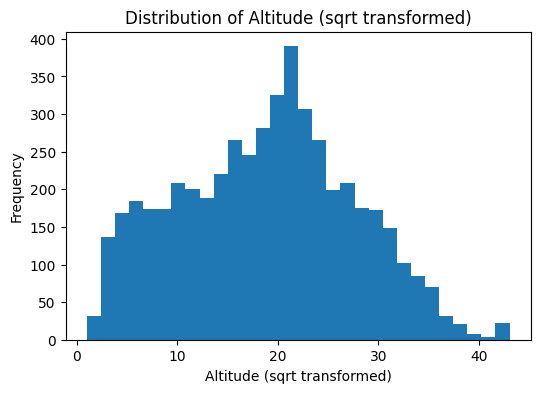

Skewness of Altitude before transformation: 1.0017531437520488
Skewness of Altitude after sqrt transformation: 0.06069539648838133

sqrt


<Figure size 1200x400 with 0 Axes>

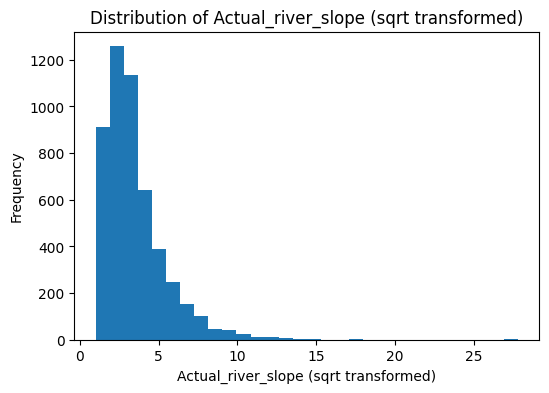

Skewness of Actual_river_slope before transformation: 10.318282505123214
Skewness of Actual_river_slope after sqrt transformation: 1.938937392363638

logIp


<Figure size 1200x400 with 0 Axes>

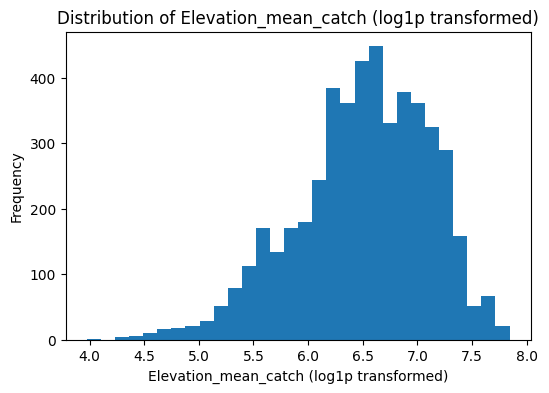

Skewness of Elevation_mean_catch before transformation: 0.848952804721131
Skewness of Elevation_mean_catch after log1p transformation: -0.5437313023893335

No transformation applied to prec_ann_catch


<Figure size 1200x400 with 0 Axes>

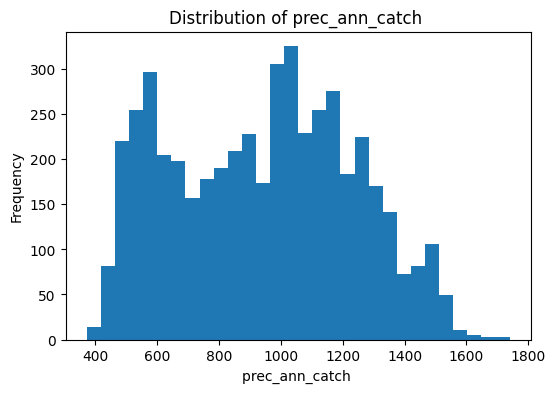

Skewness of prec_ann_catch before transformation: 0.058194917599554585

No transformation applied to temp_ann


<Figure size 1200x400 with 0 Axes>

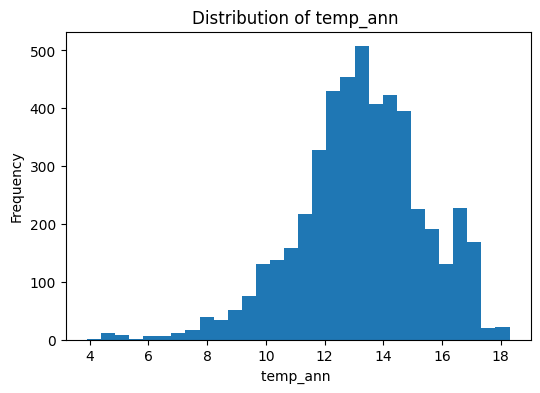

Skewness of temp_ann before transformation: -0.47646895978137016

No transformation applied to temp_jan


<Figure size 1200x400 with 0 Axes>

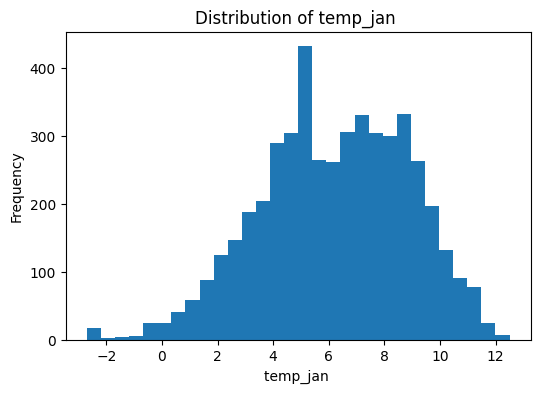

Skewness of temp_jan before transformation: -0.2878683960803722

No transformation applied to temp_jul


<Figure size 1200x400 with 0 Axes>

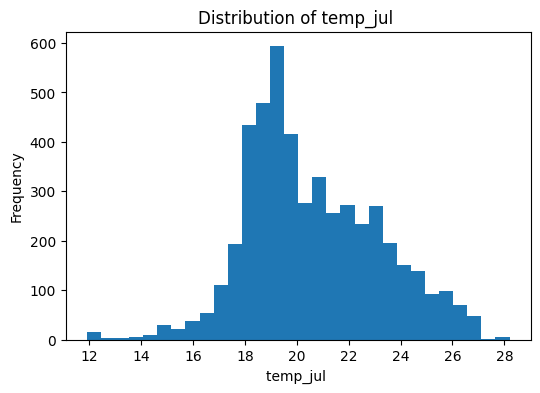

Skewness of temp_jul before transformation: 0.28796377494142245



In [6]:
for var in continuous_vars:
    # Remove NaN values before transformation
    df_no_nan = df[var].dropna()

    # Check for skewness and apply transformation if needed
    skewness = df_no_nan.skew()

    plt.figure(figsize=(12, 4))

    if abs(skewness) > 0.5:
        if min(df_no_nan) > 0:
            transformed_data = np.log1p(df_no_nan) # Log transformation
            transformation_name = "log1p"
            print('logIp')
        else:
          transformed_data = np.sqrt(df_no_nan + abs(min(df_no_nan)) + 1)
          transformation_name = "sqrt"
          print('sqrt')

        plt.figure(figsize=(6, 4))
        plt.hist(transformed_data, bins=30)
        plt.title(f'Distribution of {var} ({transformation_name} transformed)')
        plt.xlabel(f'{var} ({transformation_name} transformed)')
        plt.ylabel('Frequency')
        plt.show()
    else:
      print(f"No transformation applied to {var}")
      plt.figure(figsize=(6, 4))
      plt.hist(df_no_nan, bins=30)
      plt.title(f'Distribution of {var} ')
      plt.xlabel(f'{var} ')
      plt.ylabel('Frequency')
      plt.show()

    print(f"Skewness of {var} before transformation: {skewness}")
    if abs(skewness) > 0.5:
      print(f"Skewness of {var} after {transformation_name} transformation: {transformed_data.skew()}")
    print('')


Above was visualising, now let's apply it to the dataframe:

In [7]:
for var in continuous_vars:
    # Remove NaN values before transformation
    df_no_nan = df[var].dropna()

    # Check for skewness
    skewness = df_no_nan.skew()

    if abs(skewness) > 0.5:
        if min(df_no_nan) > 0:
            transformed_data = np.log1p(df_no_nan)
            transformation_name = "log1p"
        else:
            transformed_data = np.sqrt(df_no_nan)
            transformation_name = "sqrt"

        df[var] = transformed_data # Update the original DataFrame

        print(f"Applied {transformation_name} transformation to {var}")

    else:
        print(f"No transformation applied to {var}")


Applied sqrt transformation to Altitude
Applied sqrt transformation to Actual_river_slope
Applied log1p transformation to Elevation_mean_catch
No transformation applied to prec_ann_catch
No transformation applied to temp_ann
No transformation applied to temp_jan
No transformation applied to temp_jul


The second values look much better. Interesting using sqrt was quite good on the heavily skewed variables.

## 3. Create a column with the total number of species present (the species richness) in each sampling site
(NOTE: the first species in the dataset is ‘Abramis brama’ and all the columns to the right correspond to
species presence/absence).

In [9]:
# select all species columns
species_columns = df.columns[df.columns.get_loc('Abramis brama'):]

# sum each row
df['species_richness'] = df[species_columns].sum(axis=1)

print(df.head())


    Site_code   Latitude  Longitude Country Catchment_name  Galiza  Subsample  \
0  ES_01_0002  38.102003  -4.096070   Spain   Guadalquivir       0          1   
1  ES_02_0001  40.530188  -1.887796   Spain           Tejo       0          1   
2  ES_02_0002  40.595432  -1.928079   Spain           Tejo       0          1   
3  ES_02_0003  40.656184  -1.989831   Spain           Tejo       0          1   
4  ES_02_0004  40.676402  -2.036274   Spain           Tejo       0          1   

   Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  Squalius torgalensis  \
0                0              1             0  ...                     0   
1                1              1             1  ...                     0   
2                1              1             1  ...                     0   
3                1              1             1  ...                     0   
4                1              1             1  ...                     0   

   Thymallus thymallus  Tinca tinca  Zingel 

## 4. Check the existence of bivariate outliers in the relationship between Mean Annual Temperature (‘temp_ann’) and species richness using an appropriate plot. Run a bivariate isolation forest to detect outliers and plot the result.

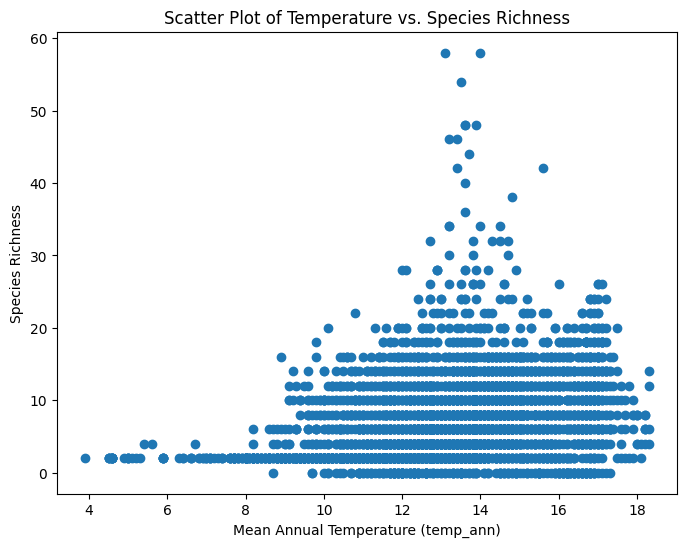

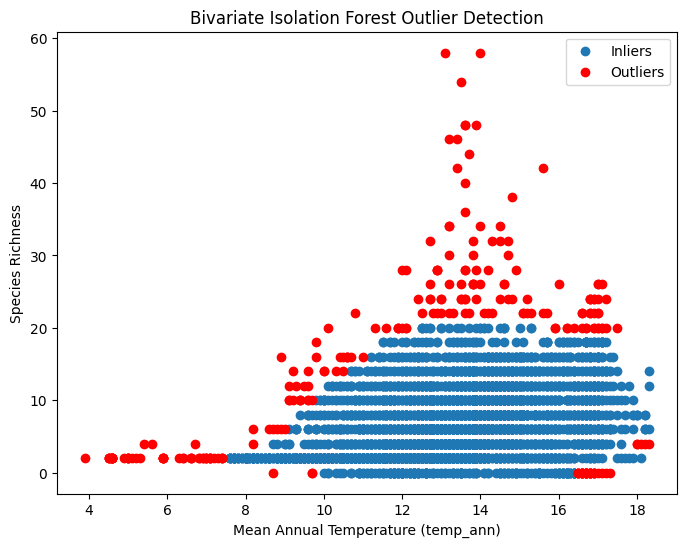

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['temp_ann'], df['species_richness'])
plt.xlabel('Mean Annual Temperature (temp_ann)')
plt.ylabel('Species Richness')
plt.title('Scatter Plot of Temperature vs. Species Richness')
plt.show()

# Bivariate Isolation Forest
X = df[['temp_ann', 'species_richness']]
model = IsolationForest(contamination=0.05)
model.fit(X)
df['outlier'] = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['temp_ann'][df['outlier'] == 1], df['species_richness'][df['outlier'] == 1], label='Inliers')
plt.scatter(df['temp_ann'][df['outlier'] == -1], df['species_richness'][df['outlier'] == -1], color='red', label='Outliers')
plt.xlabel('Mean Annual Temperature (temp_ann)')
plt.ylabel('Species Richness')
plt.title('Bivariate Isolation Forest Outlier Detection')
plt.legend()
plt.show()


## 5. Explore visually, using a single plot, if this relationship (temp_ann x species richness) may vary across countries.

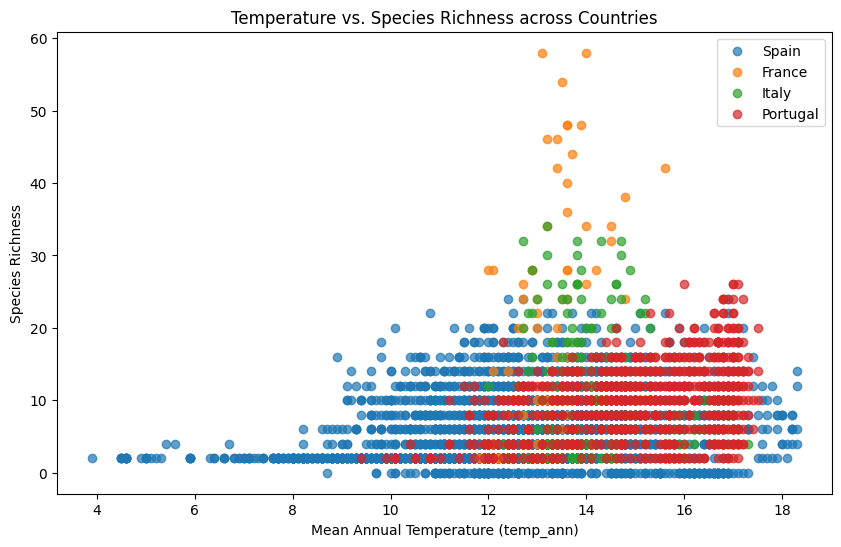

In [13]:
# scatter plot with different colors for each country
plt.figure(figsize=(10, 6))
for country in df['Country'].unique():
    subset = df[df['Country'] == country]
    plt.scatter(subset['temp_ann'], subset['species_richness'], label=country, alpha=0.7)

plt.xlabel('Mean Annual Temperature (temp_ann)')
plt.ylabel('Species Richness')
plt.title('Temperature vs. Species Richness across Countries')
plt.legend()
plt.show()
